In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
TChem_install = '/Users/odiazib/csp_clang_bld_develop/csp/install/release'
sys.path.append(TChem_install+'/example/runs/scripts/')
sys.path.append('../')
from CSPHelper import *
from CSPindexHelper import *
import os
os.getcwd() 
import matplotlib.backends.backend_pdf

In [42]:
def makePlotIndices( t, var, indices, ind_list, namesReactions,\
                   xlabel_1, ylabel_1, ylabel_2, \
                   legend_loc_x, legend_loc_y):
    
    fig, ax1 = plt.subplots()
    color = 'k'
    ax1.set_xlabel(xlabel_1)
    ax1.set_ylabel(ylabel_1, color=color)
    ax1.plot(t,var,'--.', color=color)
    
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(ylabel_2,color=color)
    
    for i in ind_list:
        ax2.plot(t,\
                 indices[:,i],'-',label=namesReactions[i])
    ax2.legend(loc='best', \
               bbox_to_anchor=(legend_loc_x,legend_loc_y) )
    ax2.tick_params(axis='y', labelcolor=color)
    return 


def getLongList(First, Second, Third, res  ):
    
    First2 = []
    for i in First:
        if (not np.isnan(i)):
            First2 += [res[i]]
        else:
            First2 += [np.nan]

    Second2 = []
    for i in Second:
        if (not np.isnan(i)):
            Second2 += [res[i]]
        else:
            Second2 += [np.nan]

    Third2 = []
    for i in Third:
        if (not np.isnan(i)):
            Third2 += [res[i]]
        else:
            Third2 += [np.nan]
            
    return First2, Second2, Third2 

def plotList(F, S, T, time, OneListNames, Ngas, y_axis, add_y_axis=True  ):
    plt.plot(time ,F,'.r',label='Top 1')#,fillstyle='none'
    plt.plot(time ,S,'.g',label='Top 2')
    plt.plot(time ,T,'.b',label='Top 3')
    plt.axhspan(Ngas-0.5,len(OneListNames),color='yellow', alpha=0.1)
    plt.axhline(y=Ngas-0.5, color='k', linestyle='-')
    if add_y_axis:
        plt.yticks(y_axis, OneListNames)
    else:
        plt.yticks([], [])
        
    plt.tick_params(axis='y', which='major', labelsize=10)
    plt.xlabel('Time [s]')
    plt.ylim([0,len(OneListNames)])        
    return 

def plotTopThree(F1, S1, T1, 
                 NgasReac,
                 logNamesReactions, 
                 simulation_time, 
#                  fig_info, 
                 return_react_list=False, use_log_scale=False):
    
    OneList = [x for x in list(dict.fromkeys(F1 + S1 + T1)) if (np.isnan(x) == False)]
    
    OneList.sort()
    y_axis = range(len(OneList))
    #key value
    res = dict(zip(OneList, y_axis))
    
    OneListNames = []
    Ngas = 0
    for reac in OneList:
        OneListNames += [logNamesReactions[reac]]
        if reac < NgasReac:
            Ngas +=1
        
    FL1, SL1, TL1 = getLongList(F1, S1, T1, res  )
    
    plt.figure()
    plotList(FL1, SL1, TL1, simulation_time, OneListNames, Ngas, y_axis  )
    if use_log_scale:
        plt.xscale('log')
    
    fig.tight_layout()
    plt.legend(loc='best')
    if return_react_list:
        return dict(zip(OneList,OneListNames))
    else:
        return
    
    
def getTopThreeReactions(IndVar,db):    
    top1 = []
    top2 = []
    top3 = []
    
    NtimeStep, Nvars, Nreactions = np.shape(db)
    
    for it in range(NtimeStep):
        reacIndexP = getReactionNoWHighestCSPIndex(db[it,IndVar,:],1e-2)[:3]
        n_reaction_w_high_index = len(reacIndexP)
        if n_reaction_w_high_index > 2:
            top1 += [reacIndexP[0]]
            top2 += [reacIndexP[1]]
            top3 += [reacIndexP[2]] 
        elif n_reaction_w_high_index > 1:
            top1 += [reacIndexP[0]]
            top2 += [reacIndexP[1]]
            top3 += [np.nan]  
        elif n_reaction_w_high_index > 0:
            top1 += [reacIndexP[0]]
            top2 += [np.nan]
            top3 += [np.nan] 
        else:
            top1 += [np.nan]
            top2 += [np.nan] 
            top3 += [np.nan]
            
    return top1, top2, top3   

def PointerVarsvsTimeV2(PointerN, St, m1, show_color_bar=True):
    
    imshow_kwargs = {
    'vmax': 1,
    'vmin': 0,
    'cmap': 'afmhot_r',
    'interpolation':'nearest',
    'aspect': 'auto' 
    }

    NtimeStep1, Nvar1, Nmodes1  = np.shape(St) 
    time_x = range(0,NtimeStep1,100)
    
    M_y = range(Nvar1,0,-10)
    M2 =  range(0,Nvar1,10)
    
    time = solTchem[:,Header.index('t')]
    time2 = np.round(time[time_x],2)
    
    aT = np.empty([ Nvar1, NtimeStep1 ])
      
    for i in range(Nvar1):
        for j in range(NtimeStep1):
            aT[i,j] = St[j,-i-1,PointerN]    
    
    plt.title(VarName)
    plt.imshow(aT,**imshow_kwargs)
    plt.plot(range(0,NtimeStep1), Nvar1-m1,'silver')
    plt.xticks(time_x, time2)
    plt.yticks(M_y, M2)

    if show_color_bar:
        plt.colorbar()
    plt.tick_params(axis='y', which='major', labelsize=10)
    plt.ylabel('Mode No')
    plt.xlabel('Time [s]')
    return 

In [3]:
outDir = ''
data = np.genfromtxt(outDir+"CSTRSolutionODE.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)
print(np.shape(solTchem))

(182, 68)


/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: Runtime

/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: Runtime

/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:3: Runtime

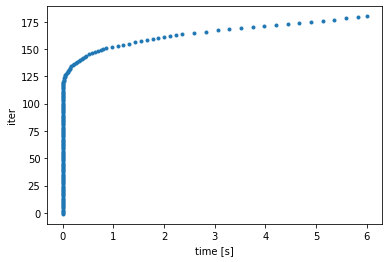

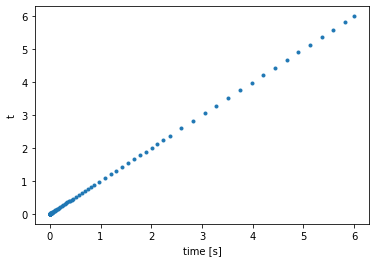

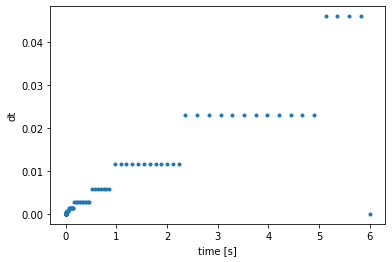

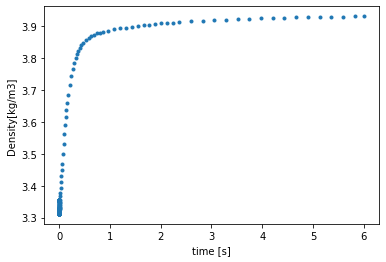

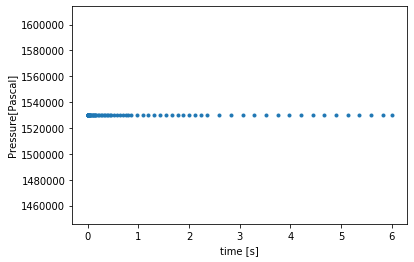

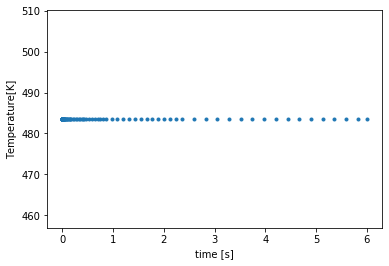

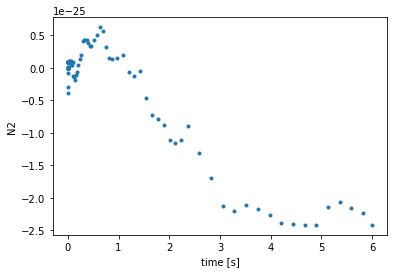

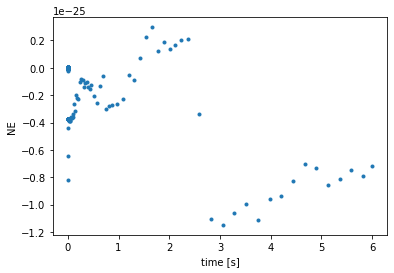

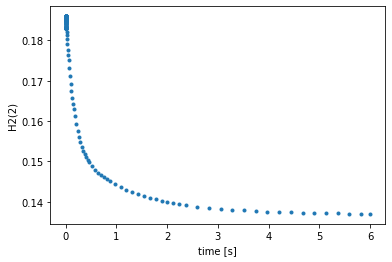

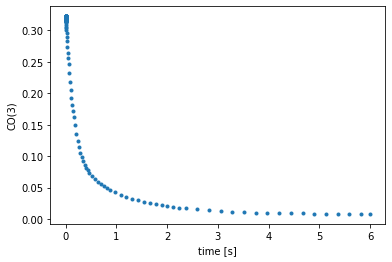

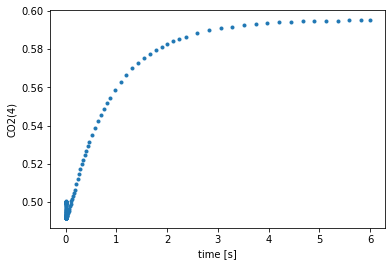

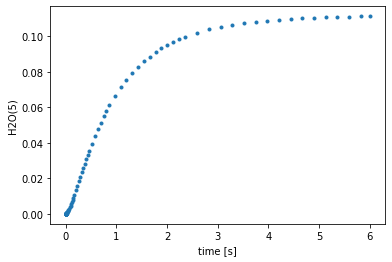

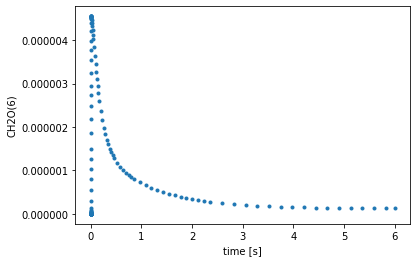

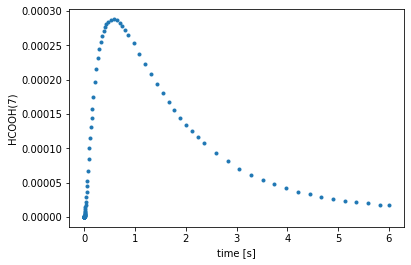

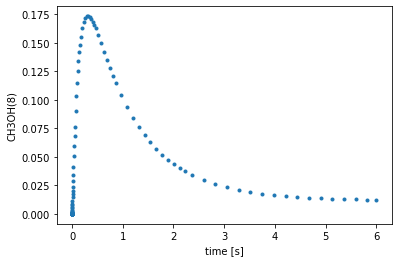

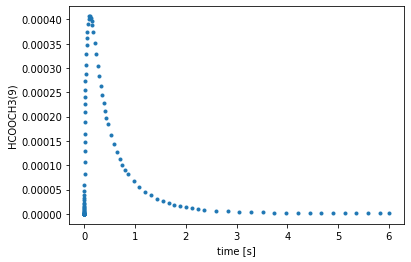

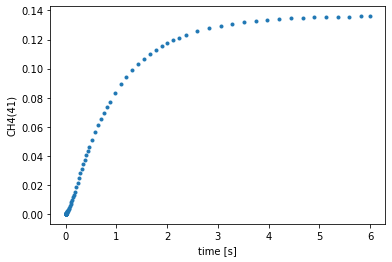

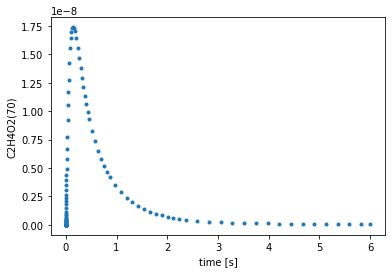

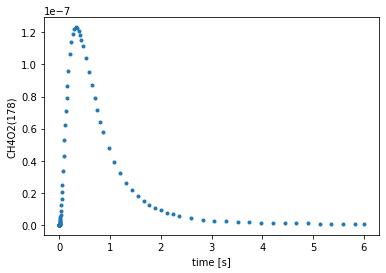

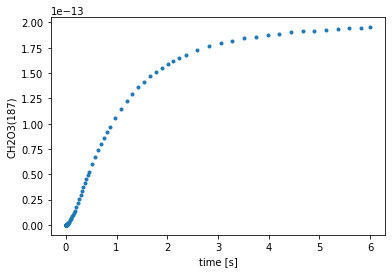

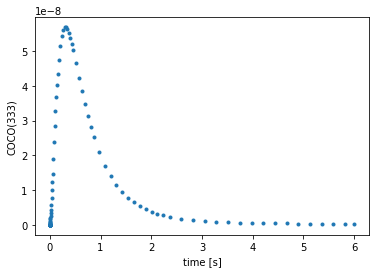

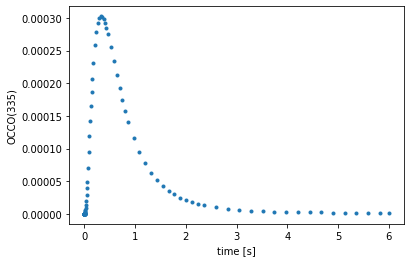

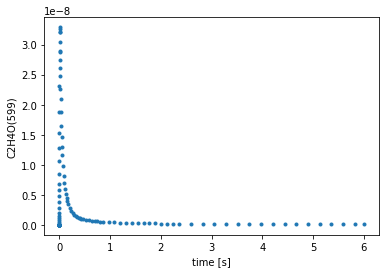

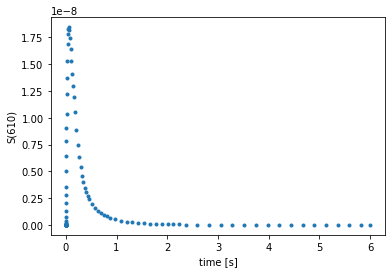

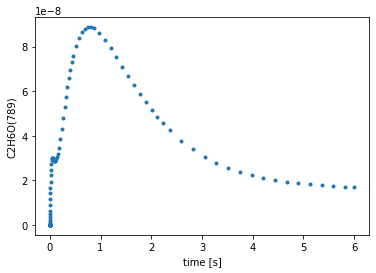

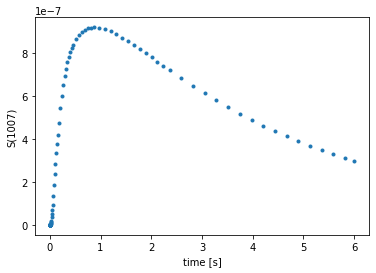

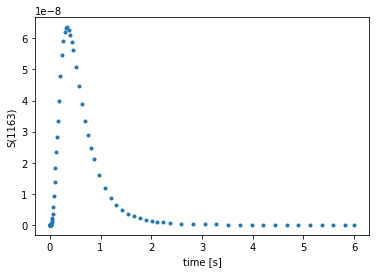

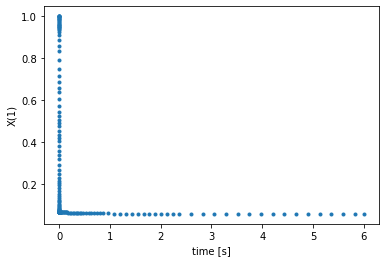

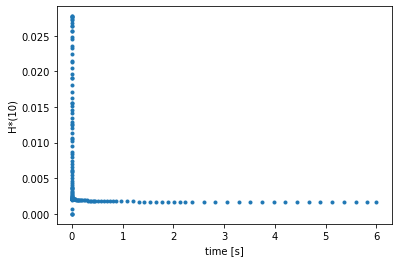

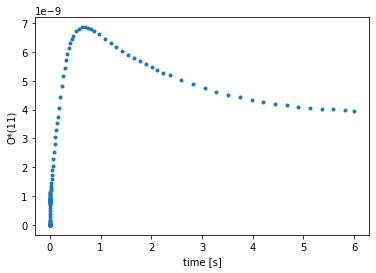

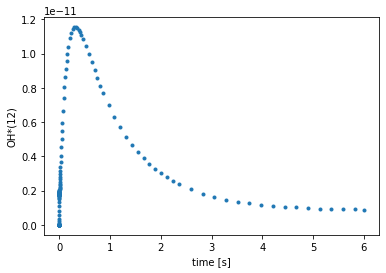

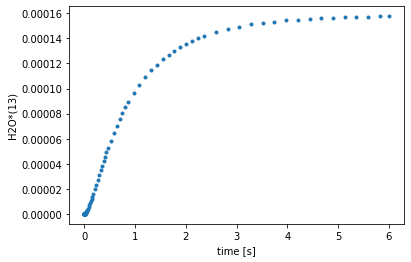

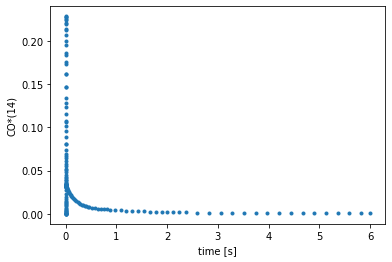

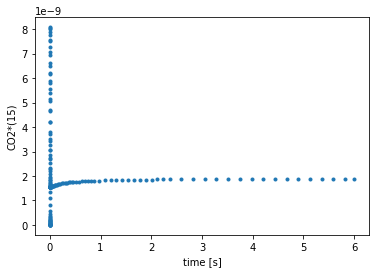

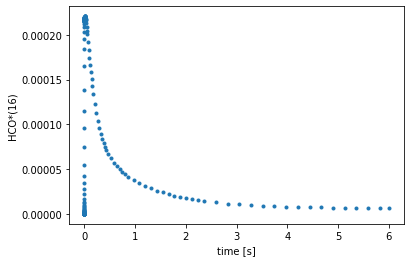

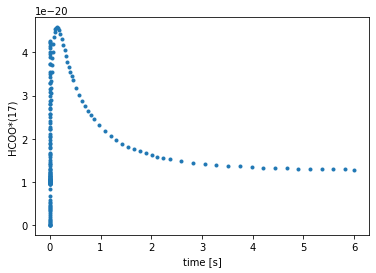

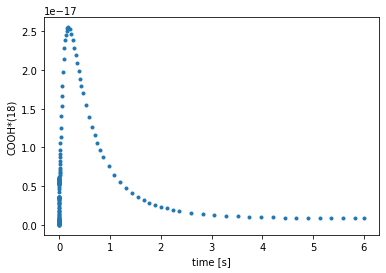

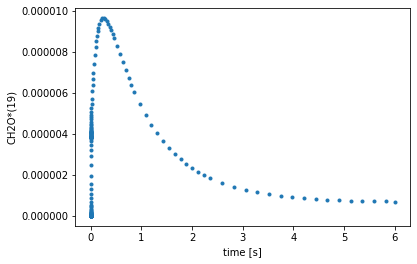

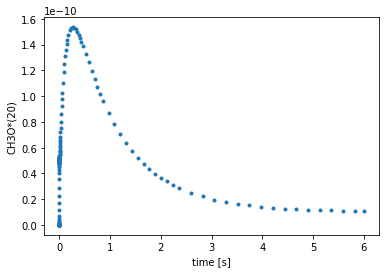

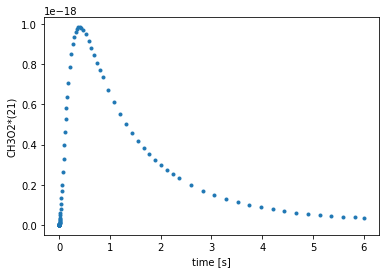

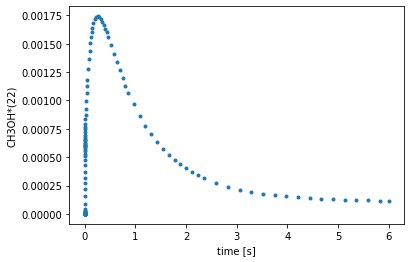

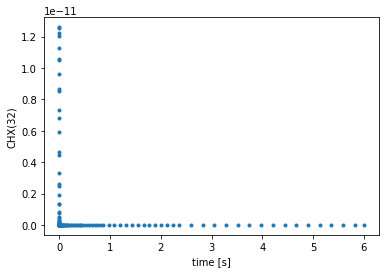

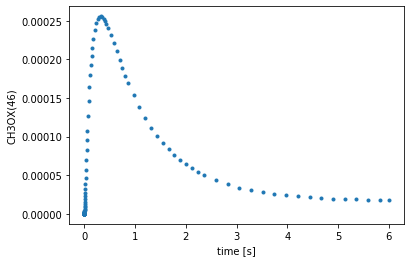

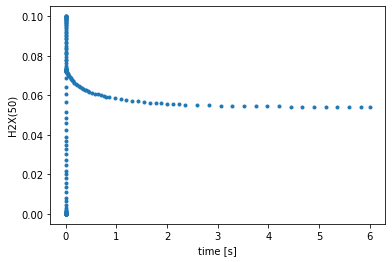

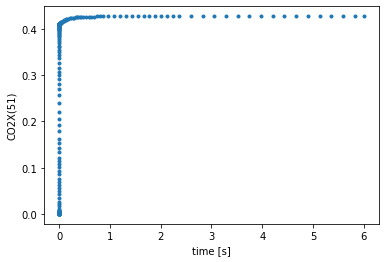

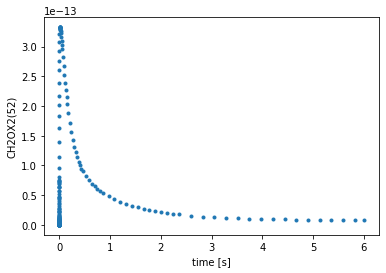

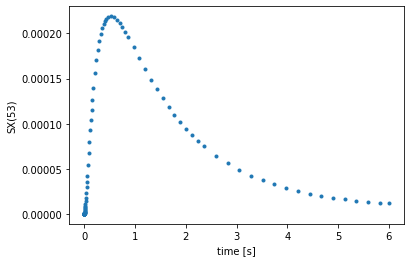

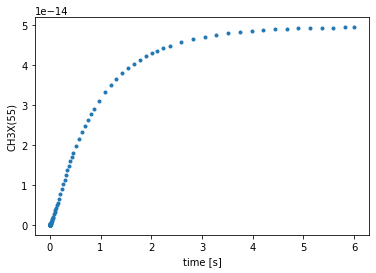

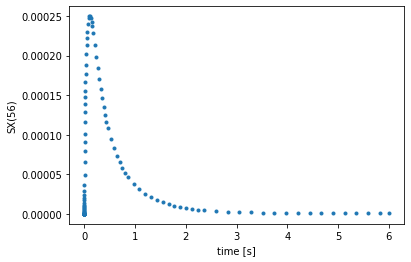

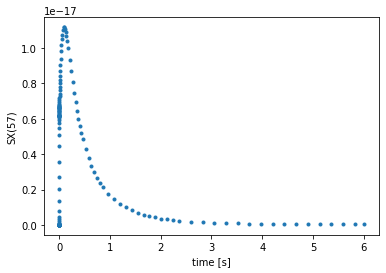

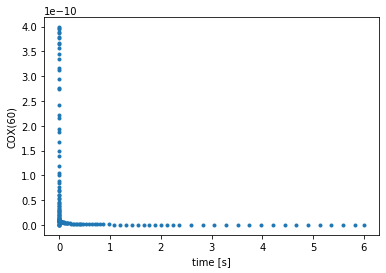

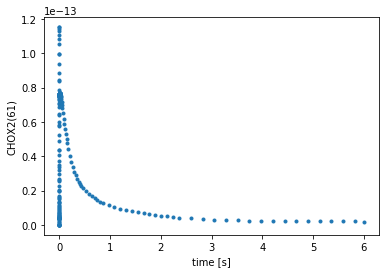

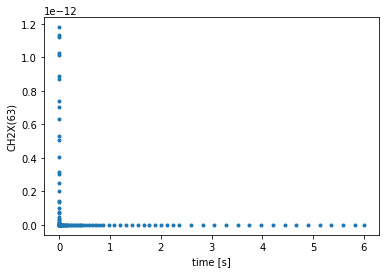

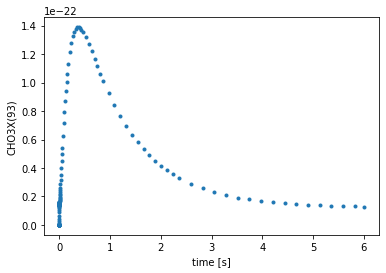

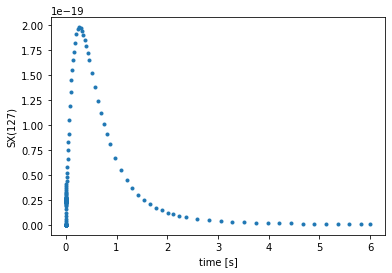

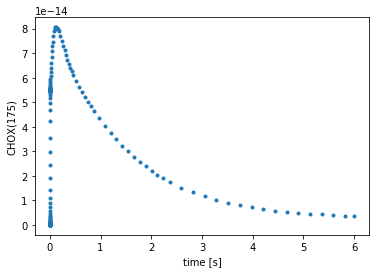

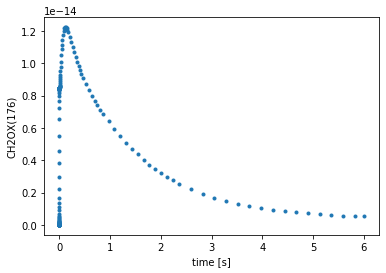

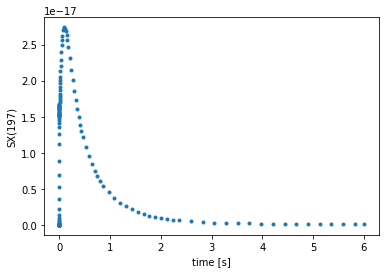

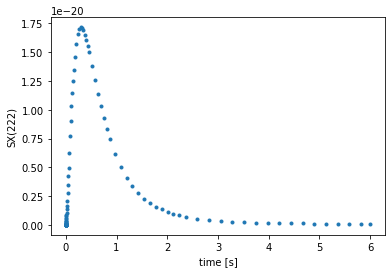

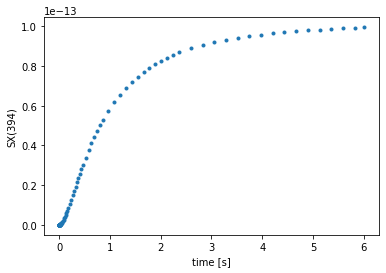

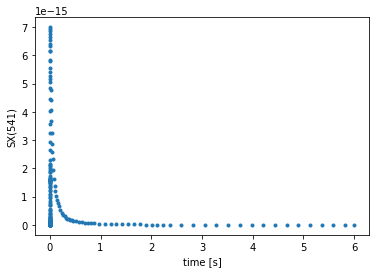

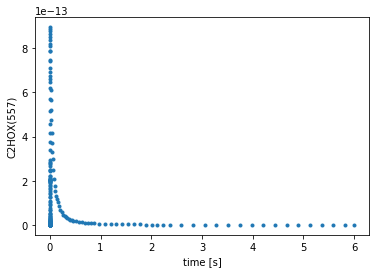

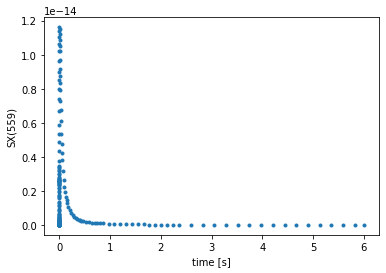

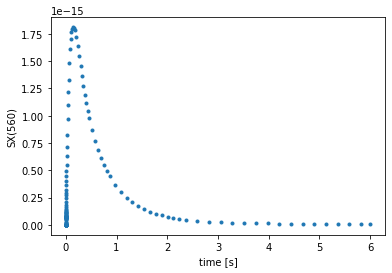

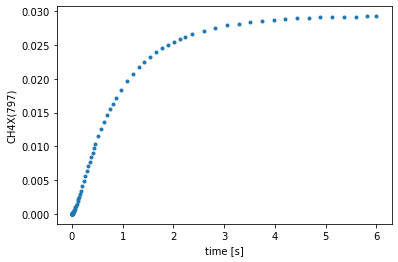

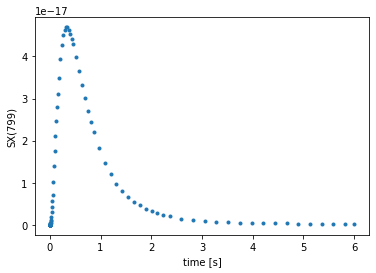

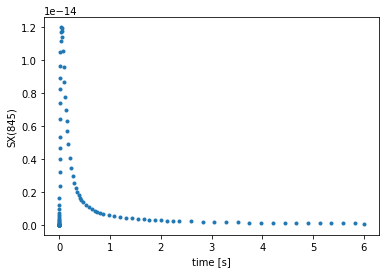

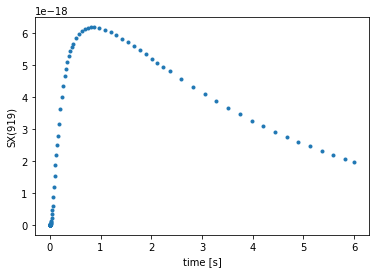

In [4]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for var in Header:
    plt.figure()
    plt.plot(solTchem[:, Header.index('t')], solTchem[:, Header.index(var),],'.')
    plt.xlabel('time [s]')
    plt.ylabel(var)
    pdf.savefig(bbox_inches='tight')
pdf.close()    

In [5]:
outDir =''
firstname ='csp_output/'
m = np.loadtxt(outDir + firstname +'_m.dat')
# mold = np.loadtxt(outDir + firstname +'_mold.dat')

In [6]:
species_names = np.loadtxt(firstname+'_speciesNames.dat',dtype='str')
ngasSpec = len(species_names)
nameRHS = ['Temperature[K]']
for i in range(len(species_names)):
    nameRHS += [species_names[i]]

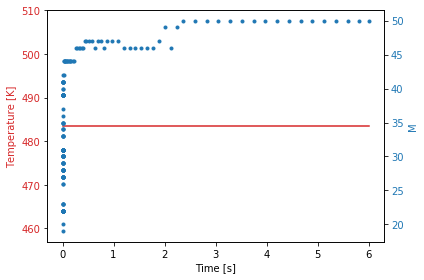

In [44]:
fig, ax1 = plt.subplots()#figsize=(8,4)

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('M',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], m,'.',  color=color)
# ax2.plot(solTchem[:,1], mold,'gs')
ax2.tick_params(axis='y', labelcolor=color)
# plt.xscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('M.pdf')

In [8]:
tau = np.loadtxt(outDir + firstname +'_tau.dat')
Nvar = len(tau[0,:])
tmp = []
for i,M in enumerate(m):
    if (M == Nvar ):
        tmp += [tau[i,int(M-1)]]     
    else:
        tmp += [tau[i,int(M)]] 

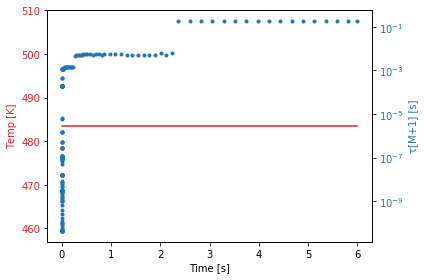

In [9]:
fig, ax1 = plt.subplots()#figsize=(8,4)

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temp [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('τ[M+1] [s]',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], tmp,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tauMp.pdf')

In [10]:
rank_jac= np.loadtxt(firstname +'_jac_numerical_rank.dat')

In [11]:
tmrank = []
for i,M in enumerate(m):
    if rank_jac[i] == Nvar:
        tmrank += [tau[i,Nvar-1]]
    else:    
        tmrank += [tau[i,int(rank_jac[i])]]

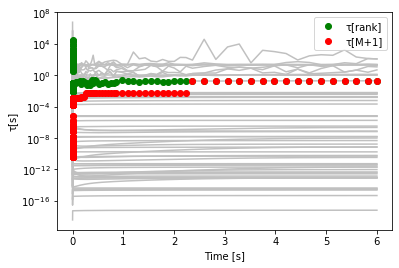

In [12]:
plt.figure()

for i in range(len(tau[0,:])):
    plt.plot(solTchem[:,1],tau[:,i],'silver')
plt.plot(solTchem[:,1],tmrank,'go', label='τ[rank]')  
plt.plot(solTchem[:,1],tmp,'ro', label='τ[M+1]')    
plt.xlabel('Time [s]')
plt.ylabel('τ[s]')
plt.yscale('log')
plt.legend(loc='best')
# plt.xlim([0,300])
# plt.ylim([1e-17,1e3])
plt.savefig('timeScales.pdf')

In [13]:
Rnames = np.loadtxt('kmod.reactions',dtype=np.str,delimiter=",")

rfwdL = []
rrevL = []
ElementPositionFwd = []
ElementPositionRev = []
for i, Reac in enumerate(Rnames):
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + '=>' + out[1]
    rrev = out[0] + '<=' + out[1]
    rfwdL += [rfwd]
    rrevL += [rrev]
    ElementPositionFwd +=[i + 1]
    ElementPositionRev +=[-(i+1)]
    
    
logNamesReactions =  rfwdL +  rrevL      
NgasReac = 2*len(Rnames)
ElementPosition = ElementPositionFwd + ElementPositionRev

In [14]:
RnamesSurf = np.loadtxt('kmodSurf.reactions',dtype=np.str,delimiter=",")
rfwdLSurf = []
rrevLSurf = []
ElementPositionSFwd = []
ElementPositionSRev = []
for i,Reac in enumerate(RnamesSurf):
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + '=>' + out[1]
    rrev = out[0] + '<=' + out[1]
    rfwdLSurf += [rfwd]
    rrevLSurf += [rrev]
    ElementPositionSFwd +=[i+1]
    ElementPositionSRev +=[-(i+1)]
    
logNamesReactions +=  rfwdLSurf +  rrevLSurf    
NSurfReac = 2*len(RnamesSurf)
ElementPosition += ElementPositionSFwd + ElementPositionSRev

In [15]:
logNamesReactions += ['cstr_conv']

In [16]:
NtotalReactions= len(logNamesReactions)

In [17]:
print('Total Number of reactions',NtotalReactions)

Total Number of reactions 791


In [18]:
print(NSurfReac/2.)

384.0


In [19]:
NtimeStep, Ndime = np.shape(solTchem)
species_names = np.loadtxt(firstname+'_speciesNames.dat',dtype='str')
ngasSpec = len(species_names)
nameRHS = ['Temperature[K]']
for i in range(len(species_names)):
    nameRHS += [species_names[i]]

In [20]:
Slowind = np.loadtxt(firstname +'_SlowImportanceIndex.dat')

In [21]:
St = np.reshape(Slowind,[NtimeStep, Nvar, NtotalReactions])

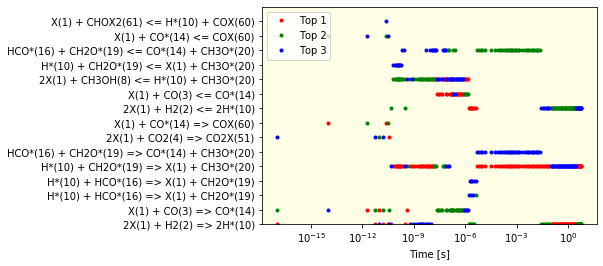

In [48]:
VarName='CH3OH(8)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False, True)  

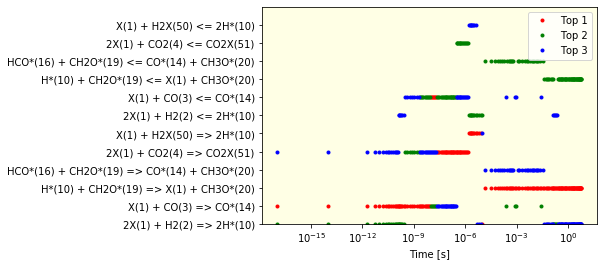

In [49]:
VarName='H2(2)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

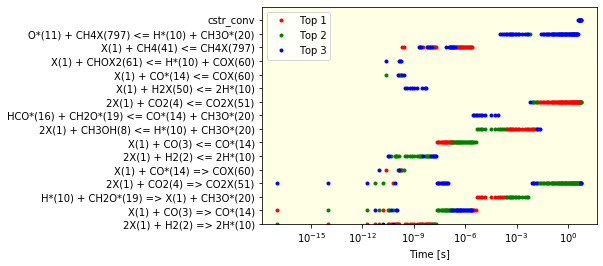

In [50]:
VarName='CH4(41)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

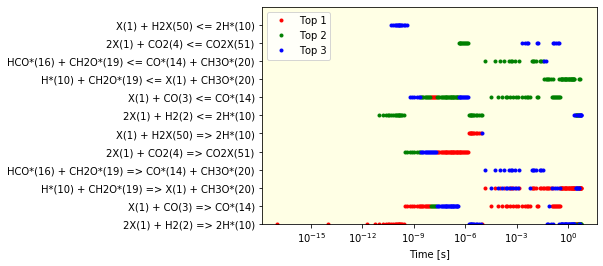

In [51]:
VarName='H*(10)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

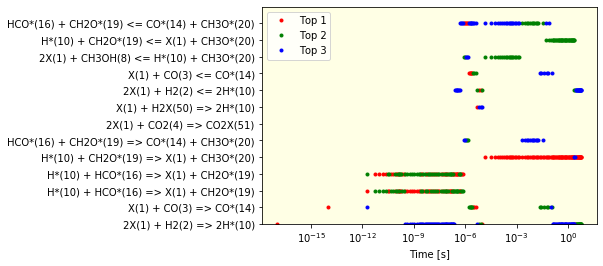

In [53]:
VarName='CH2O*(19)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

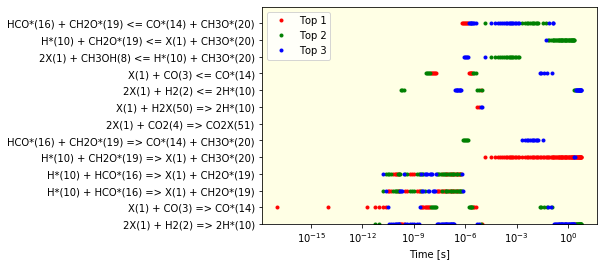

In [54]:
VarName='CH3O*(20)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

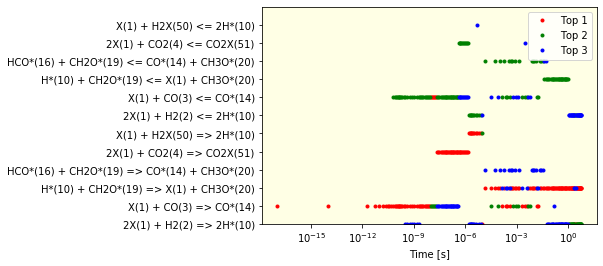

In [55]:
VarName='CO*(14)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

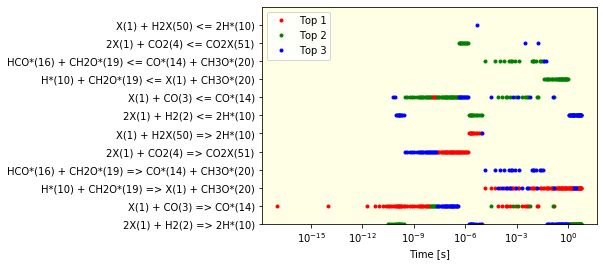

In [58]:
VarName='COX(60)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

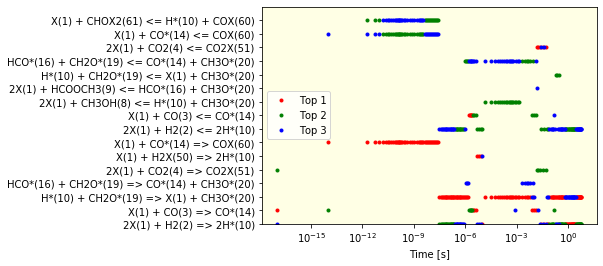

In [56]:
VarName='HCO*(16)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

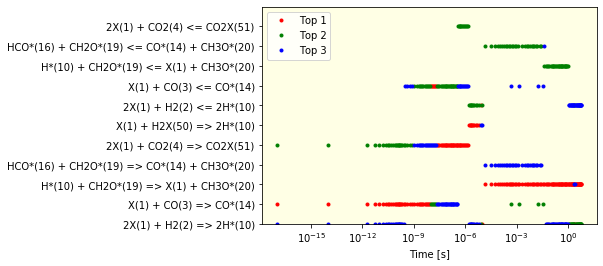

In [57]:
VarName='CO(3)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(St))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,True) 

In [27]:
Fastind = np.loadtxt(firstname +'_FastImportanceIndex.dat')
Ft = np.reshape(Fastind,[NtimeStep,Nvar,NtotalReactions])

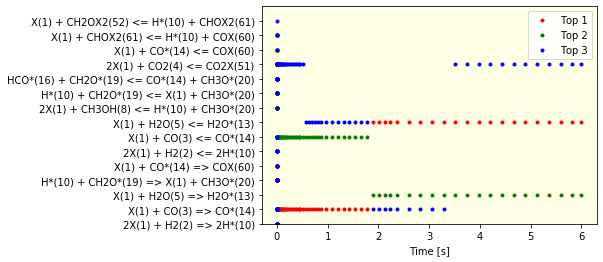

In [28]:
#set last arg to true for log scale
VarName='CH3OH(8)'
IndVar = nameRHS.index(VarName)
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(Ft))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False,
                       True) 

In [29]:
PIind = np.loadtxt(firstname +'_ParticipationIndex.dat')
# PIind = np.loadtxt(firstname +'_P_ik.dat')
Pt = np.reshape(PIind,[NtimeStep,Nvar,NtotalReactions])

1 2X(1) + H2(2) => 2H*(10)
2 X(1) + CO(3) => CO*(14)
74 X(1) + CO*(14) => COX(60)
332 CH2O*(19) + CH3OX(46) => X(1) + SX(222)
-2 X(1) + CO(3) <= CO*(14)
-74 X(1) + CO*(14) <= COX(60)
-332 CH2O*(19) + CH3OX(46) <= X(1) + SX(222)


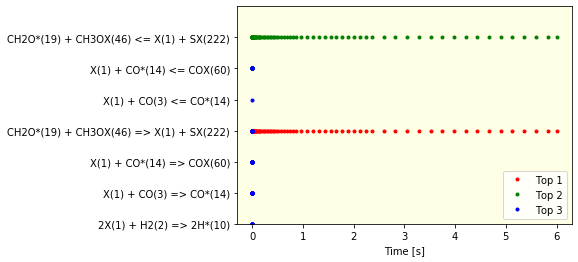

In [30]:
# index corresponds to the timescale (0-n) 0 is fastest
IndVar = 0
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(Pt))
reac_list =plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       True) 
for reac in reac_list:
    print (ElementPosition[reac],logNamesReactions[reac])

1 2X(1) + H2(2) => 2H*(10)
2 X(1) + CO(3) => CO*(14)
64 2X(1) + CO2(4) => CO2X(51)
74 X(1) + CO*(14) => COX(60)
182 2X(1) + CH3OH(8) => OH*(12) + CH3X(55)
190 2X(1) + C2H4O(599) => HCO*(16) + CH3X(55)
193 X(1) + CH4X(797) => H*(10) + CH3X(55)
194 X(1) + CH4X(797) => H*(10) + CH3X(55)
283 H*(10) + CH2X(63) => X(1) + CH3X(55)
-1 2X(1) + H2(2) <= 2H*(10)
-74 X(1) + CO*(14) <= COX(60)
-193 X(1) + CH4X(797) <= H*(10) + CH3X(55)
-194 X(1) + CH4X(797) <= H*(10) + CH3X(55)


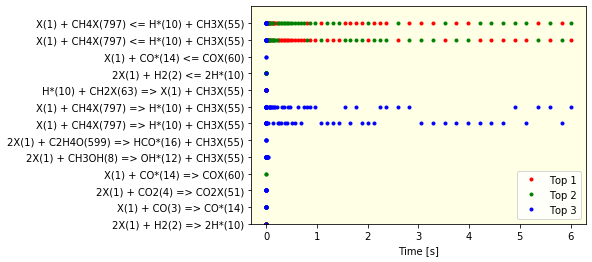

In [31]:
IndVar = 1
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(Pt))
reac_list =plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       True) 

for reac in reac_list:
    print (ElementPosition[reac],logNamesReactions[reac])

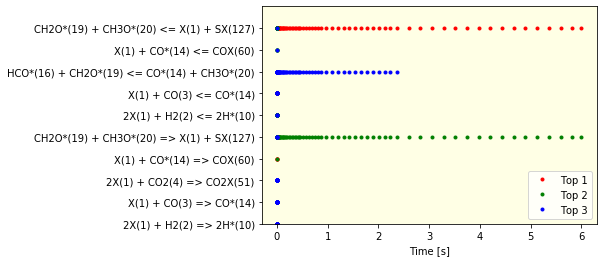

In [32]:
IndVar = 2
Top1, Top2, Top3 = getTopThreeReactions(IndVar,abs(Pt))
plotTopThree(Top1, Top2, Top3,
                       NgasReac, 
                       logNamesReactions, 
                       solTchem[:,Header.index('t')],
                       False) 

In [33]:
for ModN in range(10):
    VarName = 'Mode '+str(ModN)
    IndxList = getPartTopIndex(Pt, ModN, m, Top=3, threshold=1e-2)
    print(VarName)
    for ind in IndxList:
        print (ind,ElementPosition[ind],logNamesReactions[ind])

Mode 0
23 2 X(1) + CO(3) => CO*(14)
95 74 X(1) + CO*(14) => COX(60)
479 -74 X(1) + CO*(14) <= COX(60)
22 1 2X(1) + H2(2) => 2H*(10)
353 332 CH2O*(19) + CH3OX(46) => X(1) + SX(222)
737 -332 CH2O*(19) + CH3OX(46) <= X(1) + SX(222)
407 -2 X(1) + CO(3) <= CO*(14)
Mode 1
22 1 2X(1) + H2(2) => 2H*(10)
23 2 X(1) + CO(3) => CO*(14)
85 64 2X(1) + CO2(4) => CO2X(51)
95 74 X(1) + CO*(14) => COX(60)
479 -74 X(1) + CO*(14) <= COX(60)
406 -1 2X(1) + H2(2) <= 2H*(10)
304 283 H*(10) + CH2X(63) => X(1) + CH3X(55)
598 -193 X(1) + CH4X(797) <= H*(10) + CH3X(55)
599 -194 X(1) + CH4X(797) <= H*(10) + CH3X(55)
211 190 2X(1) + C2H4O(599) => HCO*(16) + CH3X(55)
214 193 X(1) + CH4X(797) => H*(10) + CH3X(55)
215 194 X(1) + CH4X(797) => H*(10) + CH3X(55)
203 182 2X(1) + CH3OH(8) => OH*(12) + CH3X(55)
Mode 2
23 2 X(1) + CO(3) => CO*(14)
85 64 2X(1) + CO2(4) => CO2X(51)
22 1 2X(1) + H2(2) => 2H*(10)
95 74 X(1) + CO*(14) => COX(60)
479 -74 X(1) + CO*(14) <= COX(60)
406 -1 2X(1) + H2(2) <= 2H*(10)
407 -2 X(1) + CO(3

In [34]:
Pointers = np.loadtxt(firstname +'_cspPointers.dat')
# Pointers = np.loadtxt(firstname +'_cspp_ij.dat')
Ptrs = np.reshape(Pointers,[NtimeStep,Nvar,Nvar])

63


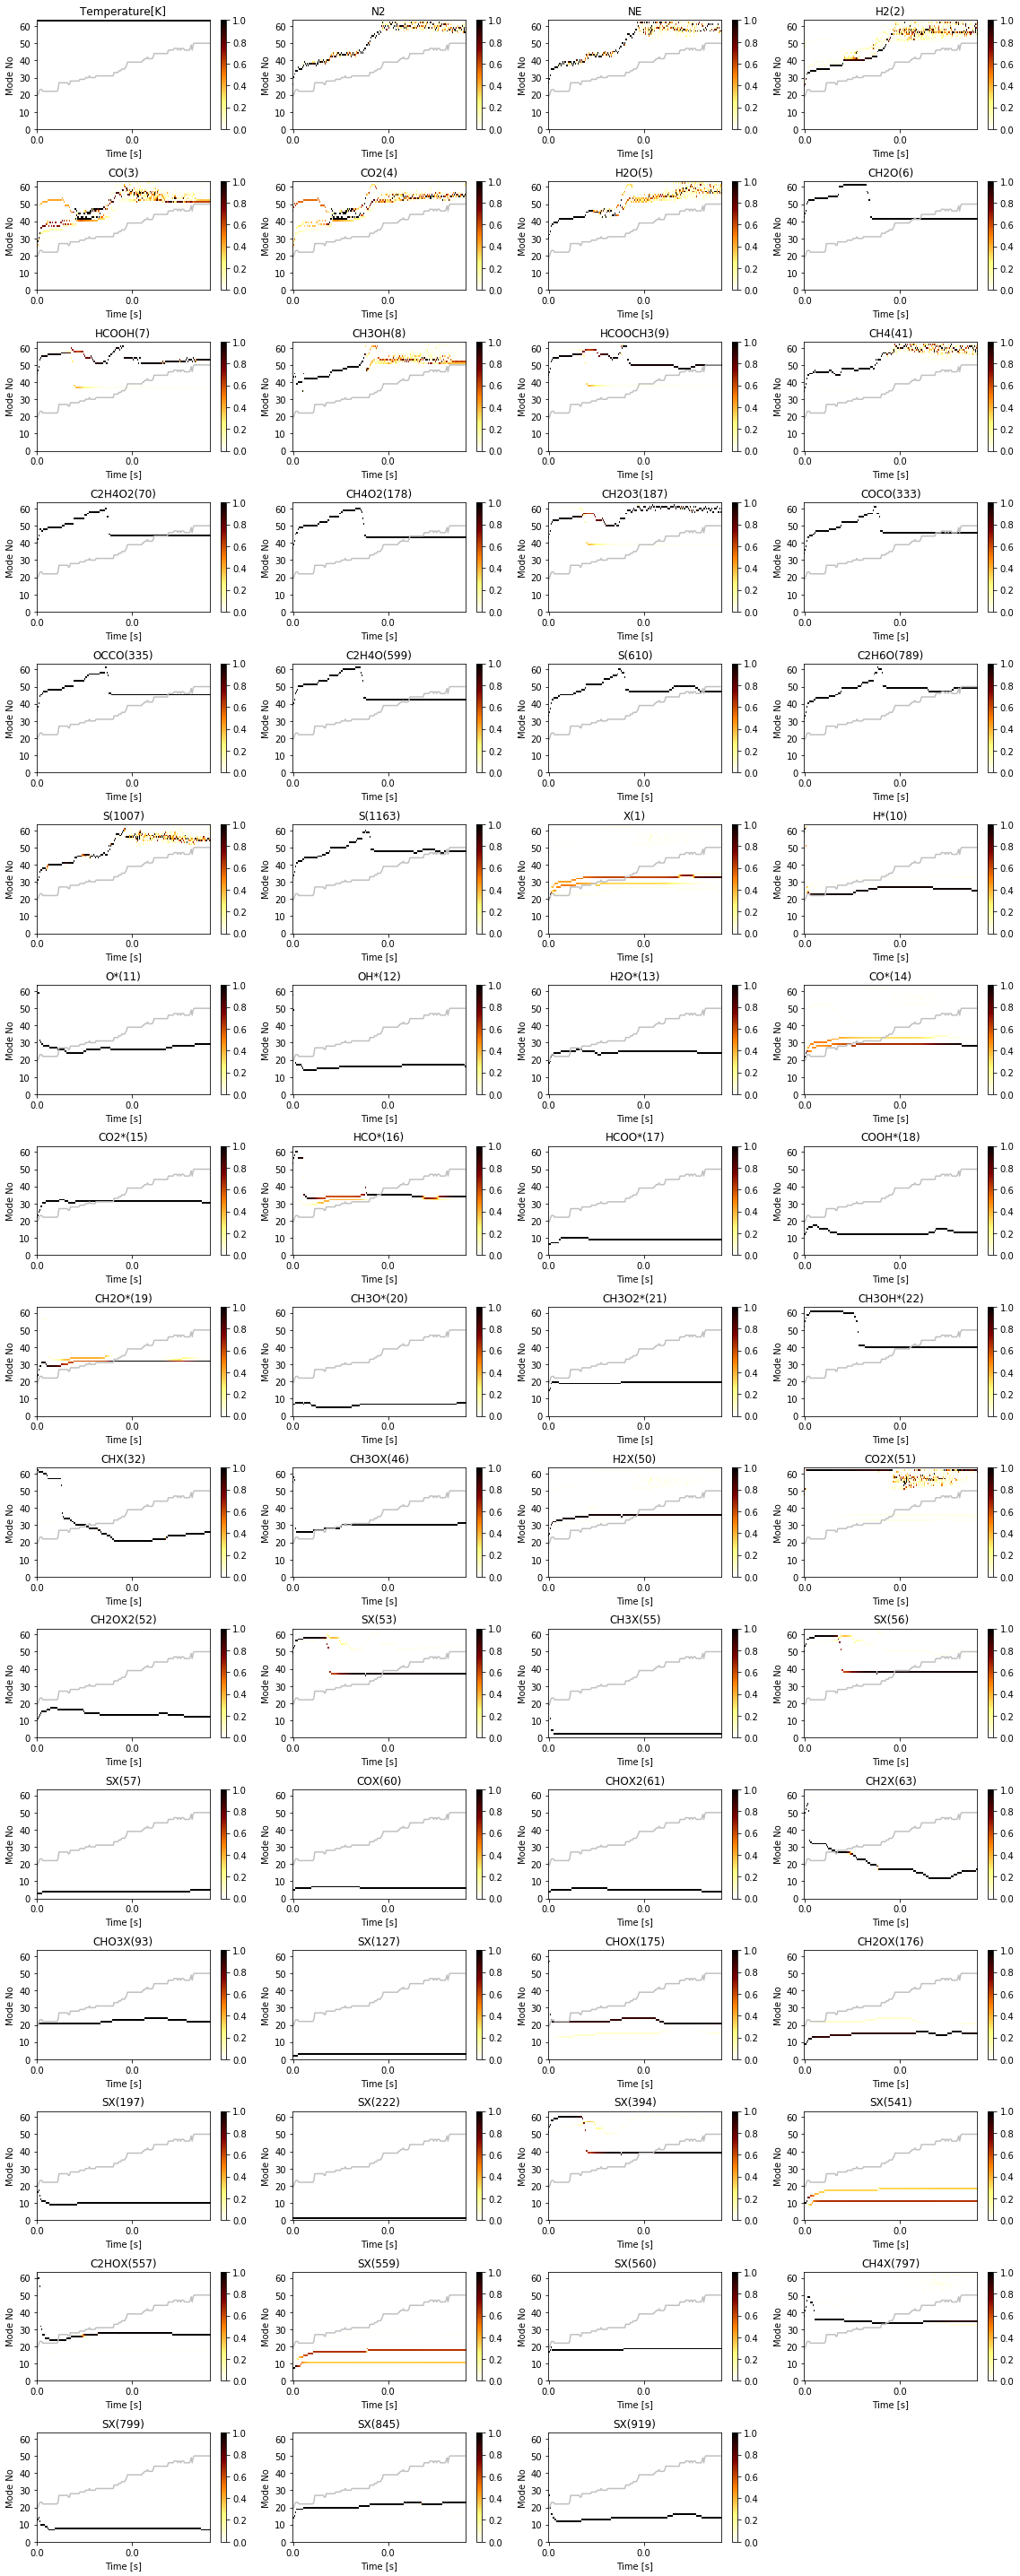

In [35]:
# species that are ~1 and below grey line can be approximated by an algebraic expression 
plt.figure(figsize=(16,40))

Npx = 16
Npy = 4
print(len(nameRHS))
varibles = nameRHS#['H*(10)']
# add_bar_plot = [3, 7, 10]
for i, VarName in enumerate(varibles):
    plt.subplot(Npx, Npy, i+1)
    IndVar = nameRHS.index(VarName)   
    PointerVarsvsTimeV2(IndVar, abs(Ptrs), m, True)

plt.tight_layout()